<a href="https://colab.research.google.com/github/Chinmay2911/-GRIP-At-The-Sparks-Foundation-Tasks/blob/master/TSF_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task # 3 - To Explore Unsupervised
Machine Learning**

Aim: From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Solution:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import plotly.express as px

In [9]:
data = load_iris()
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['species'] = data['target']

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


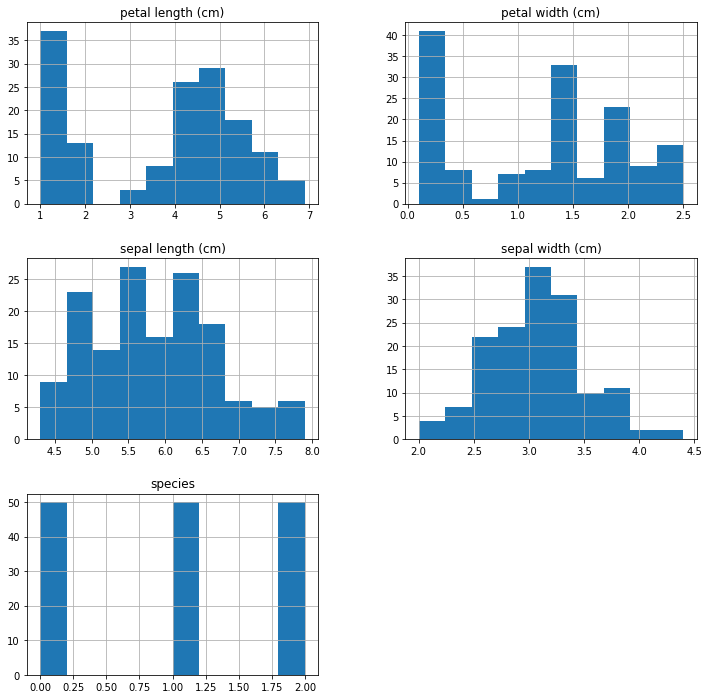

In [24]:
df.hist(figsize=(12,12))
plt.show()

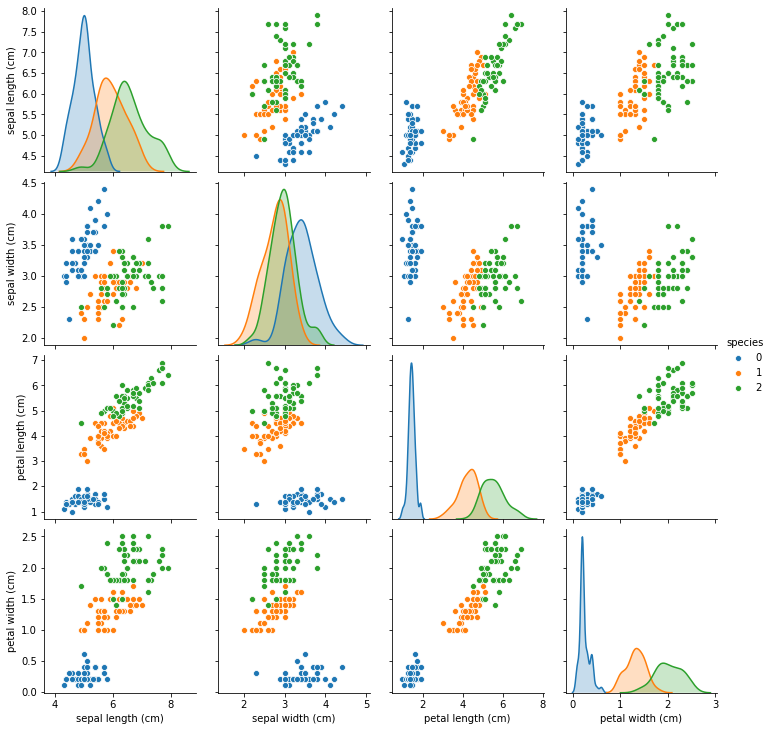

In [25]:
sns.pairplot(df,hue='species')
plt.show()

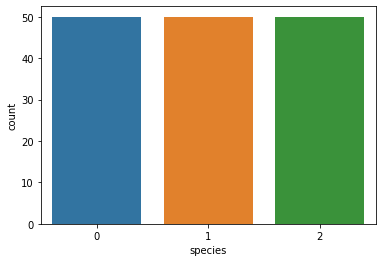

In [26]:
sns.countplot(df['species'])
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [28]:
X = df.drop('species',axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

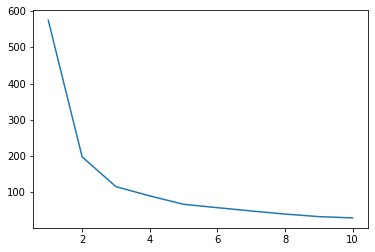

In [30]:
costs = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42,max_iter=1000)
    kmeans.fit(X_pca)
    costs.append(kmeans.inertia_)

plt.plot(range(1,11),costs)
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3,max_iter=1000,random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

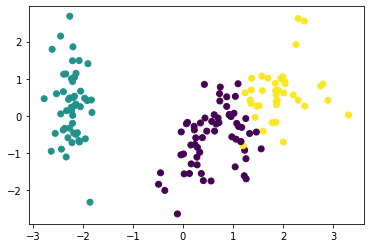

In [32]:
labels = kmeans.predict(X)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.show()